In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import random
from math import *
import sklearn as svm
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as plticker
%matplotlib inline

**Analysing the coffee data**

**Importing the csv data, turning ii into a dataframe for further analysis**

In [57]:
cofee_data = pd.read_csv('/content/coffee_analysis.csv')
dataframe = pd.DataFrame(cofee_data)
dataframe.head()
# path of my file "C:\Users\oscar\OneDrive\Pulpit\Data Analytics Study Materials\Practice datasets\NEW Kaggle datasets\coffee_analysis.csv\coffee_analysis.csv"

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


**Lets now have basic information about the dataset, like mean, max, min values. As well as a general database description.**

In [4]:
dataframe.describe()

,100g_USD,rating
count,2095.000000,2095.000000
mean,9.323313,93.114081
std,11.430659,1.563024
min,0.120000,84.000000
25%,4.930000,92.000000
50%,5.860000,93.000000
75%,8.785000,94.000000
max,132.280000,98.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


**Lets now have a basic visualization of how each columns compare to each other. For this we are going to use the seaborn pairplot function**

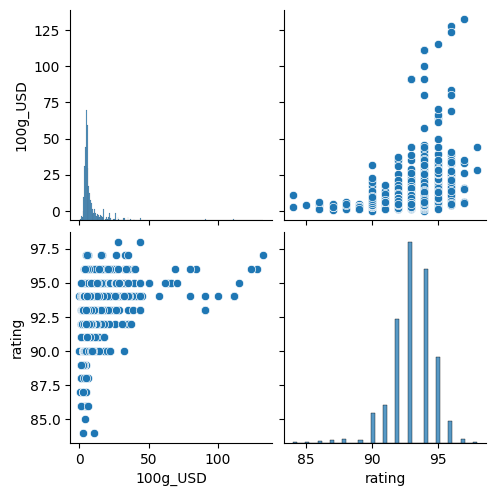

In [6]:
sns.pairplot(dataframe)

****Section 2: Right here we are going to be taking out 2 values/columns and comparing them togther. For this we will: ****



1.   **Select all the columns from the dataset**
2.   **For each analysis, we will compare 2 columns/values: get their info, values, etc.**
1.   **For each 2 columns we will make plots using matplotlib**
2.   **For each 2 columns we will make the same plots using plotly**




**Point 1: Selecting all the columns from the dataset**

In [7]:
columns = dataframe.columns
print(columns)

Index(['name', 'roaster', 'roast', 'loc_country', 'origin_1', 'origin_2',
       '100g_USD', 'rating', 'review_date', 'desc_1', 'desc_2', 'desc_3'],
      dtype='object')


**Point 2: comparing values of: location country vs 100g usd,. Where are the cheapest and most expensife coffies sold**

**Lets see the values of the location countries and the 100g usd first**

In [12]:
location_country = dataframe['loc_country']
print(location_country)
grams_usd = dataframe['100g_USD']
print(grams_usd)

0           Hong Kong
1           Hong Kong
2       United States
3       United States
4       United States
            ...      
2090        Guatemala
2091        Guatemala
2092        Guatemala
2093        Guatemala
2094        Guatemala
Name: loc_country, Length: 2095, dtype: object
0       14.32
1        9.05
2        4.70
3        4.19
4        4.85
        ...  
2090     4.70
2091     2.94
2092     2.94
2093     4.70
2094     5.88
Name: 100g_USD, Length: 2095, dtype: float64


**Lets have a hisogram using matplotlib and plotly of location country and the usd per grams feature**

**Matplotlib**

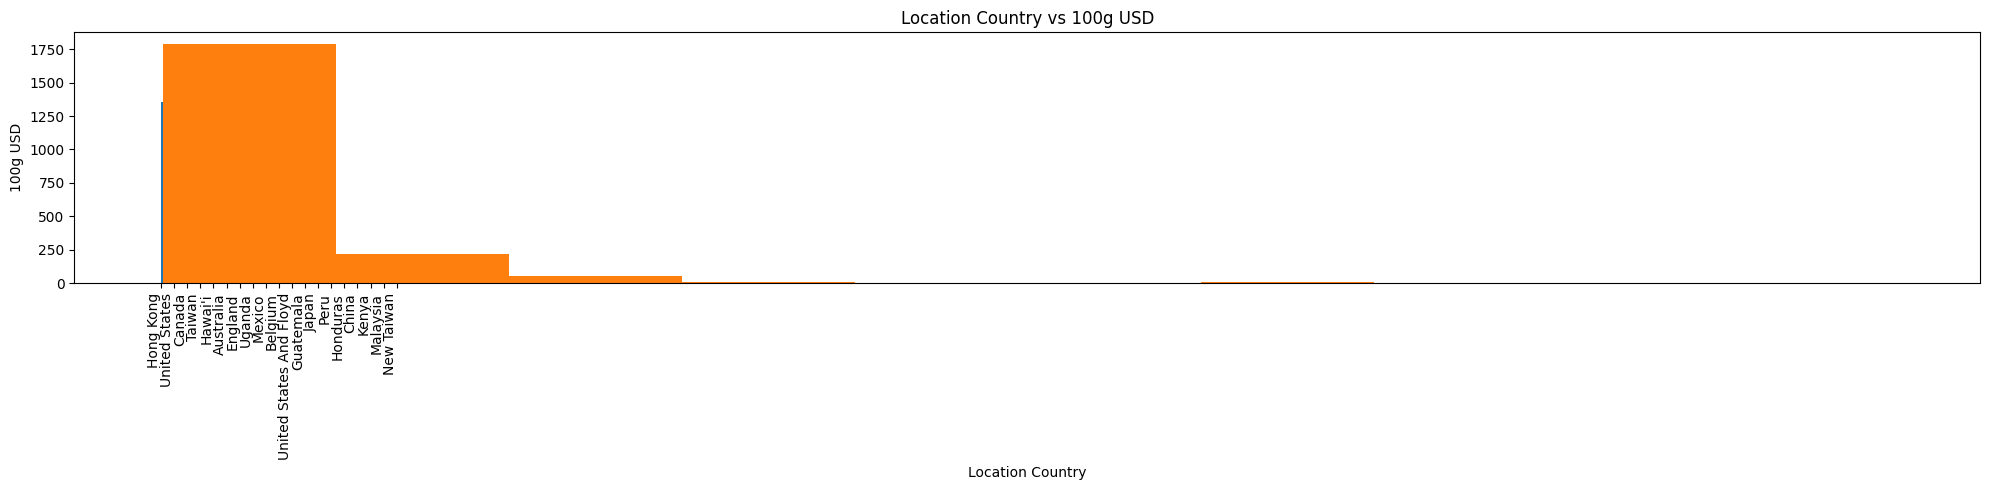

In [55]:
location_country = dataframe['loc_country']
grams_usd = dataframe['100g_USD']
fig = plt.figure(figsize = (20, 5))
plt.hist(location_country, bins=10)
plt.hist(grams_usd, bins=10)
plt.xticks(rotation=90, ha = 'right', fontsize = 10)
plt.xlabel('Location Country')
plt.ylabel('100g USD')
plt.title('Location Country vs 100g USD')
plt.tight_layout()
plt.show()


**Plotly**

In [33]:
px.histogram(dataframe, x = 'loc_country', y = '100g_USD', title = 'Location Country vs 100g USD')

**Section 3: picking 2 values/columns in order to compare them using a scatter plot. Checking first what 2 values would be better for such a plot.**

**We are going to compare 2 values: rating and 100g_USD, and plot them using matplotlib and plotly scatter plots. Both of them are numerical**

**Point 1. Matplotlib**

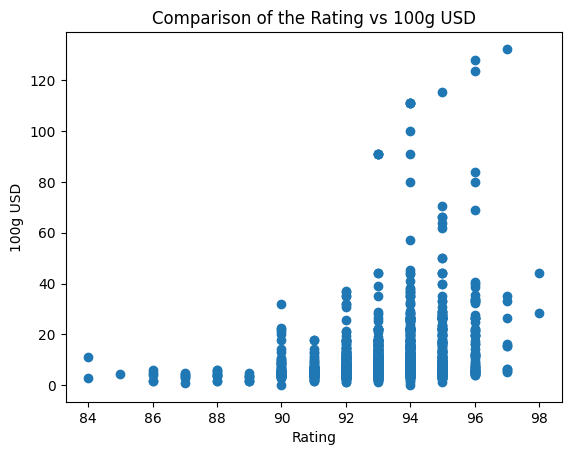

In [35]:
rating = dataframe['rating']
grams_usd = dataframe['100g_USD']

plt.scatter(rating, grams_usd)
plt.xlabel('Rating')
plt.ylabel('100g USD')
plt.title('Comparison of the Rating vs 100g USD')
plt.show()

**Point 2: Plotly**

In [45]:
rating = dataframe['rating']
grams_usd = dataframe['100g_USD']

fig = px.scatter(dataframe, x = rating, y = grams_usd, title = 'Comparison of the Rating vs 100g USD')
fig.show()

**Point 2.1 Plotly. Plotting rating vs grams usd with a histogram.**

In [56]:
rating = dataframe['rating']
grams_usd = dataframe['100g_USD']

fig = px.histogram(dataframe, x = rating, y = grams_usd, title = 'Comparison of the Rating vs 100g USD')
fig.show()